In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
tesla = pd.read_csv('TSLA.csv')

In [17]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


<AxesSubplot:>

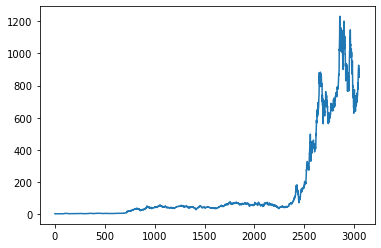

In [18]:
tesla['Close'].plot()

In [19]:
tesla  = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

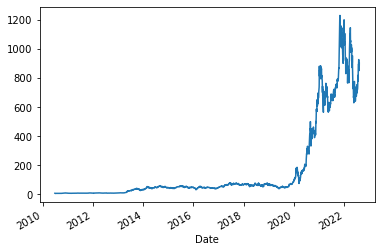

In [20]:
tesla['Close'].plot()

Date
2020-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-02-29    AxesSubplot(0.125,0.2;0.775x0.68)
2020-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2021-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-09-30    AxesSubplot(0.125,0.2

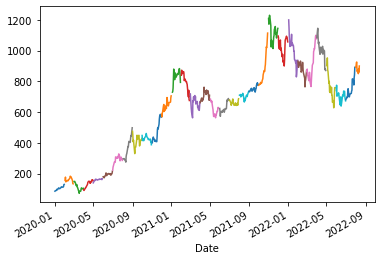

In [14]:
tesla.loc['2020':'2022', 'Close'].resample('M').plot()

In [21]:
data = tesla.copy()

In [47]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [48]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

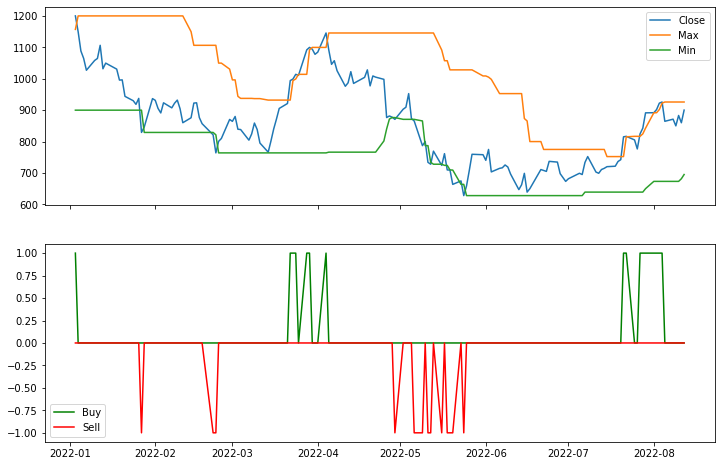

In [51]:
start = '2022'
end = '2022'
fig, ax=plt.subplots(2, figsize=(12, 8), sharex=True) 
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['Close', 'Max', 'Min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy', 'Sell'])